In [25]:
from sklearn.model_selection import train_test_split
# Import KMeans
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
# iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = iris.data
y = iris.target
print(X.shape, y.shape)

#
#
#
# # Create a KMeans instance with 3 clusters: model
# model = KMeans(n_clusters=3, n_init='auto')
# #
# # # Fit model to points
# model.fit(points)
# #
# # Determine the cluster labels of new_points: labels
# labels = model.predict(new_points)
#
# # Print cluster labels of new_points
# print(labels)


(150, 4) (150,)


In [23]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]


# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


NameError: name 'new_points' is not defined

### How many clusters of grain? Plotting inertia

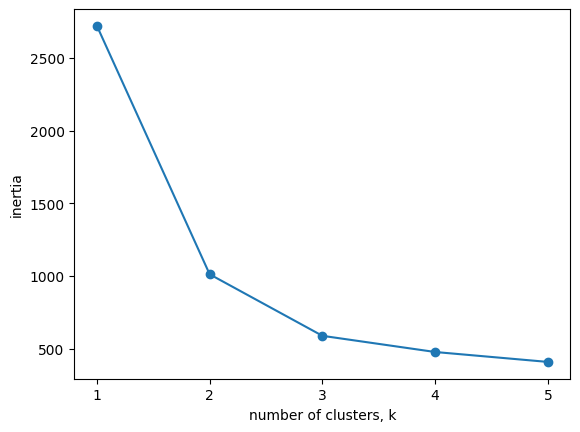

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

grains = pd.read_csv('datasets/Grains/seeds.csv', header=None)

samples = grains.drop([7], axis=1).values

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init='auto')

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3, n_init='auto')

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': grains[7]})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters.
But depending on the type of data you are working with, the clustering may not always be this good.
Is there anything you can do in such situations to improve your clustering?

### Evaluating the grain clustering

In [29]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3, n_init='auto')

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Calculate the homogeneity score
homogeneity = homogeneity_score(grains[7], labels)

# Calculate the completeness score
completeness = completeness_score(grains[7], labels)

# Calculate the V-measure
v_measure = v_measure_score(grains[7], labels)

# Calculate the Adjusted Rand Score
ARI = adjusted_rand_score(grains[7], labels)

# Calculate the Adjusted Mutual Information Score
AMI = adjusted_mutual_info_score(grains[7], labels)

# Print the score
print("Homogeneity: {}".format(homogeneity))
print("Completeness: {}".format(completeness))
print("V-measure: {}".format(v_measure))
print("Adjusted Rand Index: {}".format(ARI))
print("Adjusted Mutual Information Score: {}".format(AMI))


Homogeneity: 0.6934607041029826
Completeness: 0.696395547296022
V-measure: 0.6949250270680578
Adjusted Rand Index: 0.7166198557361053
Adjusted Mutual Information Score: 0.6922160128787073


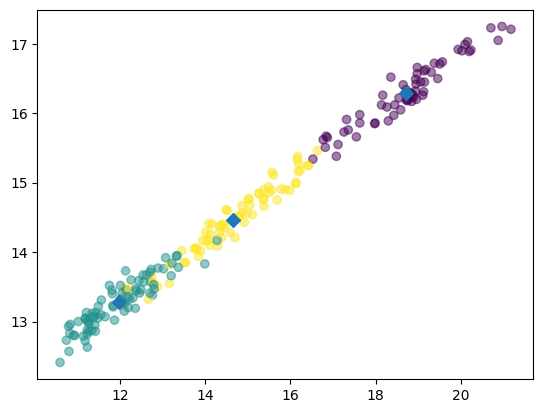

In [30]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = samples[:,0]
ys = samples[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a KMeans model with 10 clusters: model
model = KMeans(n_clusters=10, n_init='auto')

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


### Transforming features for better clusterings

In [41]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4, n_init='auto')

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [42]:
# Import pandas
import pandas as pd

fish_df = pd.read_csv('datasets/fish.csv', header=None)
samples = fish_df.drop([0], axis=1).values
species = fish_df[0].values

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1           33     0      1      0
2            0     0      0     13
3            1     0     19      1


The cross-tabulation shows that the 4 clusters are made up of 4 species of fish. The clustering is pretty good, but not perfect.

In [ ]:
### Evaluating the fish clustering

# Import pandas
import pandas as pd

fish_df = pd.read_csv('datasets/fish.csv', header=None)

samples = fish_df.drop([0], axis=1).values
species = fish_df[0].values

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

### Clustering stocks using KMeans

Clustering stocks using KMeans
In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While **StandardScaler()** standardizes features (such as the features of the fish data from the previous exercise) by **removing the mean and scaling to unit variance**, **Normalizer() rescales each sample - here, each company's stock price - independently of the other**.

KMeans and make_pipeline have already been imported for you.

In [48]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from pandas import read_csv, DataFrame

stocks_df = read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)

# Get the NumPy array of movements: movements
movements = stocks_df.values

# Get the stock companies names: companies
companies = stocks_df.index

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 4 clusters: kmeans
kmeans = KMeans(n_clusters=4, n_init='auto')

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Calculate the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
27       0                      Kimberly-Clark
56       0                            Wal-Mart
0        1                               Apple
58       1                               Xerox
26       1                      JPMorgan Chase
35       1                            Navistar
44       1                        Schlumberger
22       1                                  HP
18       1                       Goldman Sachs
17       1                     Google/Alphabet
16       1                   General Electrics
13       1                   DuPont de Nemours
49       1                               Total
51       1                   Texas instruments
1        1                                 AIG
10       1                      ConocoPhillips
53       1                       Valero Energy
8        1                         Caterpillar
2        1                              Amazon
57       1                               Exxon
5        1   